In [2]:
import pandas as pd

In [3]:
X = pd.read_excel('Country-data.xlsx',sheet_name=0,header=0,index_col=0)

In [4]:
print(X.shape) #dimension

(27, 9)


In [5]:
n = X.shape[0] #nombre d'observation
p = X.shape[1] #nombre de variables

In [6]:
print(X)

                      Décès_Enfants  Exportations  Santé  Importations  \
Pays                                                                     
Algeria                        27.3          38.4   4.17          31.4   
Argentina                      14.5          18.9   8.10          16.0   
Australia                       4.8          19.8   8.73          20.9   
Belgium                         4.5          76.4  10.70          74.7   
Brazil                         19.8          10.7   9.01          11.8   
Cameroon                      108.0          22.2   5.13          27.0   
Canada                          5.6          29.1  11.30          31.0   
China                          15.7          26.3   5.07          22.6   
Cote d'Ivoire                 111.0          50.6   5.30          43.3   
Denmark                         4.1          50.5  11.40          43.6   
Egypt                          29.1          21.3   4.66          26.6   
France                          4.2   

In [7]:
import sklearn

In [8]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[ 0.20562906  0.11256325 -0.92692405 -0.18790174 -0.66462092  1.68977422
   0.1815581   0.48377796 -0.9069796 ]
 [-0.2499184  -0.95719399  0.21674933 -1.26258594 -0.4269202   2.51383411
   0.07629896  0.00712936 -0.6177323 ]
 [-0.59513796 -0.90782058  0.40008629 -0.92064097  0.50339122 -0.87511218
   1.00859425 -0.39618869  1.44265944]
 [-0.60581485  2.19721839  0.97337803  2.83377529  0.49109636 -0.7515032
   0.70785383 -0.46035293  1.07119458]
 [-0.06129328 -1.40704063  0.48156938 -1.55568164 -0.5990483   0.36956161
  -0.16429338 -0.51535084 -0.57315652]
 [ 3.07771345 -0.77615815 -0.64755345 -0.49495437 -1.08428563 -0.74635282
  -2.7055499   2.51870085 -1.06299484]
 [-0.56666624 -0.39762867  1.14798465 -0.21581561  0.4747032  -0.58154084
   0.90333511 -0.67117827  1.21978052]
 [-0.20721082 -0.55123483 -0.66501411 -0.802007   -0.80273323  0.11719327
  -0.10414529 -0.70784355 -0.90202673]
 [ 3.18448238  0.78184727 -0.59808157  0.64253606 -1.08305614 -0.1489094
  -2.85592011  2.6653619

In [30]:
import numpy

#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

In [11]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

9


In [12]:
#valeur corrigée
valPropre = (n-1)/n*acp.explained_variance_
print(valPropre)

[3.91988456 2.06647291 1.40806749 0.98805515 0.3909368  0.12217856
 0.04554745 0.04268845 0.01616864]


In [13]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.43554273 0.2296081  0.15645194 0.10978391 0.04343742 0.0135754
 0.00506083 0.00474316 0.00179652]


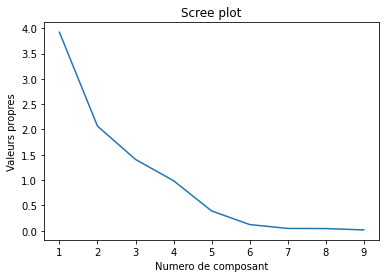

In [14]:
import matplotlib
import matplotlib.pyplot as plt

#scree plot
plt.plot(numpy.arange(1,p+1),valPropre)
plt.title("Scree plot")
plt.ylabel("Valeurs propres")
plt.xlabel("Numero de composant")
plt.show()

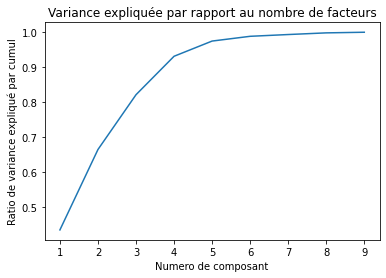

In [15]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée par rapport au nombre de facteurs")
plt.ylabel("Ratio de variance expliqué par cumul")
plt.xlabel("Numero de composant")
plt.show()

# Représentation des Variables

In [19]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(valPropre)

#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
    
#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.90051404  0.03650595 -0.30648405  0.26847995  0.02492171  0.02894981
  -0.12355459  0.00235168 -0.0706921 ]
 [-0.17583593  0.963687   -0.11217355 -0.03446959  0.08937129  0.06709431
  -0.09898329 -0.01416991  0.06427042]
 [-0.49740344 -0.57455143 -0.45707808 -0.09162931  0.44446777  0.06500565
  -0.01256874 -0.05653724  0.00569277]
 [-0.02963517  0.76650203 -0.45327869 -0.43331171  0.08135585 -0.03861503
   0.08429792  0.00525111 -0.05596587]
 [-0.70917986  0.34501598  0.04779446  0.59330832 -0.07070341  0.04103339
   0.04470691 -0.11908759 -0.02942018]
 [ 0.19689138  0.28277393  0.8563664   0.05244595  0.37921163 -0.00867193
   0.00823575  0.02118023 -0.02766943]
 [-0.93362863 -0.05565125  0.12637635 -0.20049823 -0.03671837 -0.23922225
  -0.09541379 -0.02958123 -0.02270764]
 [ 0.85402822  0.09620377 -0.25716597  0.34318935  0.14634238 -0.22724454
   0.04450084 -0.02698687  0.04126234]
 [-0.82886875  0.08639178 -0.26347129  0.45374744  0.08119941 -0.02226354
   0.00832226  0.15173

In [20]:
#on affiche pour les trois premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2]}))

              id     COR_1     COR_2     COR_3
0  Décès_Enfants  0.900514  0.036506 -0.306484
1   Exportations -0.175836  0.963687 -0.112174
2          Santé -0.497403 -0.574551 -0.457078
3   Importations -0.029635  0.766502 -0.453279
4        Revenue -0.709180  0.345016  0.047794
5      Inflation  0.196891  0.282774  0.856366
6     Expect_Vie -0.933629 -0.055651  0.126376
7   Naiss_Totale  0.854028  0.096204 -0.257166
8            PIB -0.828869  0.086392 -0.263471


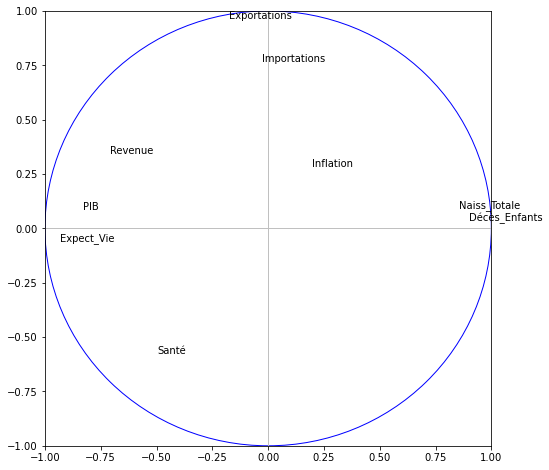

In [29]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

# Représentation des individus

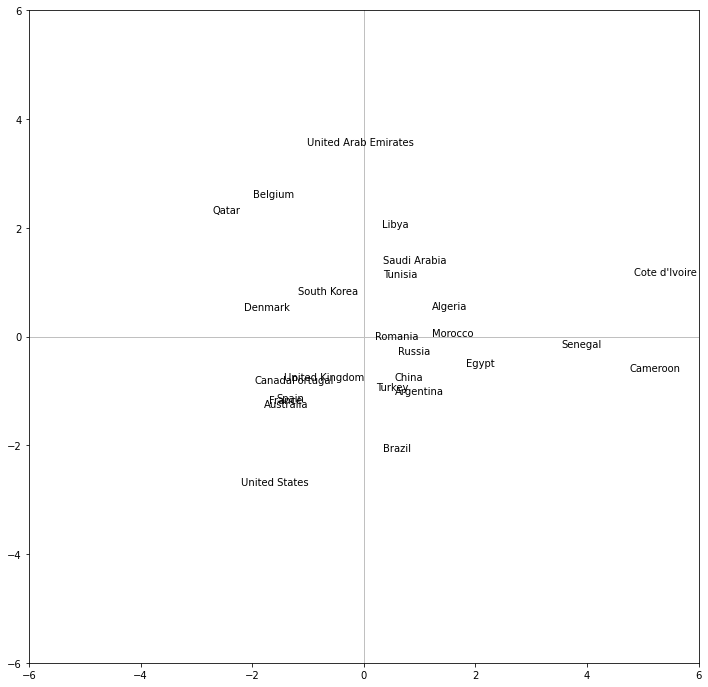

In [28]:
#positionnement des individus dans le premier plan factoriel
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [23]:
#Contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                      ID        d_i
0                Algeria   5.336123
1              Argentina   9.508871
2              Australia   6.460694
3                Belgium  16.838900
4                 Brazil   5.752096
5               Cameroon  27.265577
6                 Canada   5.161556
7                  China   3.415911
8          Cote d'Ivoire  29.117841
9                Denmark   7.104984
10                 Egypt   4.794142
11                France   5.195344
12                 Libya   6.096693
13               Morocco   3.787167
14              Portugal   3.885759
15                 Qatar  26.815611
16               Romania   2.055814
17                Russia   5.226724
18          Saudi Arabia   5.678122
19               Senegal  15.374720
20           South Korea   3.512627
21                 Spain   4.498748
22               Tunisia   4.640615
23                Turkey   1.975256
24  United Arab Emirates  13.868816
25        United Kingdom   3.133326
26         United States  16

In [24]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2]}))

                      id    COS2_1    COS2_2    COS2_3
0                Algeria  0.282641  0.045860  0.524938
1              Argentina  0.033501  0.117152  0.654435
2              Australia  0.498498  0.263471  0.014044
3                Belgium  0.234966  0.387902  0.260376
4                 Brazil  0.020793  0.767000  0.181452
5               Cameroon  0.831118  0.015253  0.078536
6                 Canada  0.745506  0.143924  0.071042
7                  China  0.089974  0.189143  0.330787
8          Cote d'Ivoire  0.803213  0.043250  0.100112
9                Denmark  0.650825  0.032700  0.200682
10                 Egypt  0.702024  0.063765  0.182424
11                France  0.554399  0.286757  0.124902
12                 Libya  0.018402  0.664610  0.226579
13               Morocco  0.400659  0.000003  0.104435
14              Portugal  0.428166  0.185534  0.137807
15                 Qatar  0.273383  0.192442  0.019713
16               Romania  0.021369  0.001220  0.006578
17        